In [2]:
%reload_ext autoreload
%autoreload 2

# Hypothesis

Juniors less likely to complete each lecture's lessons during the hours of the day registered for the course than freshmen.

## Methodology

First, I will read the CSV file and convert it to a column-oriented data table.

In [15]:
from EX07 import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows("survey.csv")
columns: dict[str, list[str]] = columnar(data_rows)

Next, I will select just the graduation year and lesson_time columns. Here are the first 10 values:

In [17]:
from EX07 import head, select
subset: dict[str, list[str]] = select(columns, ["year", "lesson_time"])
head(subset, 10)

{'year': ['23', '24', '23', '24', '22', '24', '22', '24', '24', '22'],
 'lesson_time': ['5', '4', '2', '2', '3', '6', '2', '7', '6', '2']}

Now, I will find the average Likert scale response filter per graduation year for comparison. First I call the helper function for the class of 2025, then the class of 2022.

In [24]:
from EX07 import average_only_year
average_only_year(25, (subset["year"]), subset["lesson_time"])

4.763440860215054

In [25]:
from EX07 import average_only_year
average_only_year(22, (subset["year"]), subset["lesson_time"])

4.243243243243243

# Conclusion

Based on the findings calculated above, the class of 2025, freshmen, were more likely to complete each lecture's lessons during the hours of the day registered for the course, than the class of 2022, juniors. Although there is a 0.52 point difference in the average scores reported, both scores were in the middle of the overall Likert scale. Looking at the visualization of average scores for all 4 years, there seems to be no clear correlation between graduation year and the score given. 


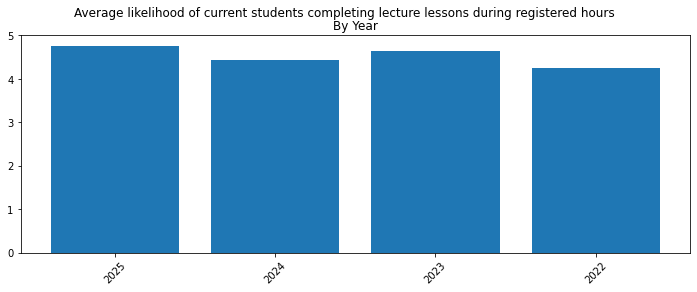

In [35]:
from matplotlib import pyplot as plt
from EX07 import average_only_year
fig, axes = plt.subplots(1, figsize=(12, 4), sharey=True)
fig.suptitle("Average likelihood of current students completing lecture lessons during registered hours")

lesson_time: dict[str, float] = {}
lesson_time["2025"] = average_only_year(25, (subset["year"]), subset["lesson_time"])
lesson_time["2024"] = average_only_year(24, (subset["year"]), subset["lesson_time"])
lesson_time["2023"] = average_only_year(23, (subset["year"]), subset["lesson_time"])
lesson_time["2022"] = average_only_year(22, (subset["year"]), subset["lesson_time"])

axes.set_title("By Year")
axes.bar(lesson_time.keys(), lesson_time.values())
axes.tick_params(axis='x', labelrotation = 45)
